# 캐글 데이터 다운로드 받는 법
- 캐글에서 받은 API key 필요

In [1]:
from google.colab import drive

drive.mount('/drive')


Mounted at /drive


In [2]:
import os, json

with open('/drive/MyDrive/Colab Notebooks/DeepLearning_2022_05/data/kaggle.json') as f:
    kaggle = json.load(f)
os.environ['KAGGLE_USERNAME']= kaggle['username']
os.environ['KAGGLE_KEY']=kaggle['key']


In [3]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset


 98% 769M/788M [00:05<00:00, 160MB/s]
100% 788M/788M [00:05<00:00, 158MB/s]


In [4]:
!unzip microsoft-catsvsdogs-dataset.zip > /dev/null

In [5]:
cat_dir= 'PetImages/Cat'
os.unlink(f'{cat_dir}/Thumbs.db')
cat_list = os.listdir(cat_dir)
len(cat_list)

12500

In [6]:
dog_dir= 'PetImages/Dog'
os.unlink(f'{dog_dir}/Thumbs.db')
dog_list = os.listdir(dog_dir)
len(dog_list)

12500

미지 파일 에러 찾기

In [7]:
from PIL import Image
from glob import glob

In [8]:
for fname in cat_list:
    try:
        img=Image.open(f'PetImages/Cat/{fname}')
    except:
        print(fname)        

666.jpg


In [9]:
for fname in dog_list:
    try:
        img=Image.open(f'PetImages/Dog/{fname}')
    except:
        print(fname)        

11702.jpg


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

In [10]:
!cp PetImages/Cat/10000.jpg PetImages/Cat/666.jpg
!cp PetImages/Dog/10000.jpg PetImages/Dog/11702.jpg

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed=2022
np.random.seed(seed)
tf.random.set_seed(seed)

#센터링

In [12]:
from PIL import Image
IMAGE_SIZE=150
def center_image(img, src_format='OpenCV', dst_format='OpenCV'):
    if src_format == 'OpenCV':
        h,w = img.shape[:-1]
    else:
        h,w = np.array(img).shape[:-1]
    
    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else:
        width, height = (w*IMAGE_SIZE) // h, IMAGE_SIZE
    interpolation=cv2.INTER_AREA if h + w > 300 else cv2.INTER_CUBIC
    new_img=cv2.resize(img,dsize=(width,height),interpolation=interpolation)

    diff=abs(width-height) //2
    if h > w:
        final_img=new_img[diff:diff+IMAGE_SIZE, :]
    else:
        final_img=new_img[:,diff:diff+IMAGE_SIZE]

    return final_img if dst_format =='OpenCV' else Image.fromarray(final_img)


# 폴더 만들기

In [13]:
CENTER_DIR = 'cats_and_dogs_centered'

train_dir = f'{CENTER_DIR}/train'
validation_dir = f'{CENTER_DIR}/validation'
test_dir = f'{CENTER_DIR}/test'

train_cats_dir = f'{CENTER_DIR}/train/cats'
train_dogs_dir = f'{CENTER_DIR}/train/dogs'
validation_cats_dir = f'{CENTER_DIR}/validation/cats'
validation_dogs_dir = f'{CENTER_DIR}/validation/dogs'
test_cats_dir = f'{CENTER_DIR}/test/cats'
test_dogs_dir = f'{CENTER_DIR}/test/dogs'

In [14]:
import os
if not os.path.exists(CENTER_DIR):
    os.mkdir(CENTER_DIR)
for dir in [train_dir,validation_dir,test_dir,train_cats_dir,train_dogs_dir,validation_cats_dir,validation_dogs_dir,test_cats_dir,test_dogs_dir]:
    os.mkdir(dir)


In [15]:
old_dir = 'cats_and_dogs_filtered'

old_train_dir = f'{old_dir}/train'
old_validation_dir = f'{old_dir}/validation'
old_test_dir = f'{old_dir}/test'


old_train_cats_dir = f'{old_dir}/train/cats'
old_train_dogs_dir = f'{old_dir}/train/dogs'
old_validation_cats_dir = f'{old_dir}/validation/cats'
old_validation_dogs_dir = f'{old_dir}/validation/dogs'
old_test_cats_dir = f'{old_dir}/test/cats'
old_test_dogs_dir = f'{old_dir}/test/dogs'

In [16]:
import os
if not os.path.exists(old_dir):
    os.mkdir(old_dir)
for dir in [old_train_dir,old_validation_dir,old_test_dir,old_train_cats_dir,old_train_dogs_dir,old_validation_cats_dir,old_validation_dogs_dir,old_test_cats_dir,old_test_dogs_dir]:
    os.mkdir(dir)


# 분류해 폴더로 보내기
- 0~7999.jpg=train
- 8000~9999 = valid
- 10000~12499= test

In [17]:
import shutil
src = '/content/PetImages/'
t_dir = '/content/cats_and_dogs_filtered/train/'
v_dir ='/content/cats_and_dogs_filtered/validation/'
te_dir = '/content/cats_and_dogs_filtered/test/'


for i in range(8000):
    cat_file =cat_list[i]
    shutil.move(src + 'Cat/'+ cat_file, t_dir +'cats/'+ cat_file)
    dog_file =dog_list[i]
    shutil.move(src + 'Dog/'+ dog_file, t_dir +'dogs/'+ dog_file)

for r in range(8000,10000):
    cat_file =cat_list[r]
    shutil.move(src + 'Cat/'+ cat_file, v_dir +'cats/'+ cat_file)
    dog_file =dog_list[r]
    shutil.move(src + 'Dog/'+ dog_file, v_dir +'dogs/'+ dog_file)

for k in range(10000,12500):
    cat_file =cat_list[k]
    shutil.move(src + 'Cat/'+ cat_file, te_dir +'cats/'+ cat_file)
    dog_file =dog_list[k]
    shutil.move(src + 'Dog/'+ dog_file, te_dir +'dogs/'+ dog_file)

In [18]:
# cats_and_dogs_filtered -> image 축소/확대 후 센터링 -> cats_and_dogs_centered 로 보냄.
from glob import glob
import cv2

for src_dir in [old_train_cats_dir, old_train_dogs_dir,old_validation_cats_dir,old_validation_dogs_dir,old_test_cats_dir,old_test_dogs_dir]:
#    dst_dir = src_dir.split('/')[1:]
#   dst_dir = '/'.join([CENTER_DIR]+dst_dir)
    dst_dir=src_dir.replace('filtered','centered')

    for fname in glob('/content/'+f'{src_dir}/*.jpg'):
        dst_fname = fname.split('/')[-1]
        try:
            src_img = cv2.imread(fname)
            dst_img = center_image(src_img, src_format='OpenCV',dst_format='Pillow')
            dst_img.save('/content/'+f'{dst_dir}/{dst_fname}')
        except:
            print('/content/'+f'{src_dir}'+fname)



/content/cats_and_dogs_filtered/train/cats/content/cats_and_dogs_filtered/train/cats/850.jpg
/content/cats_and_dogs_filtered/train/cats/content/cats_and_dogs_filtered/train/cats/660.jpg
/content/cats_and_dogs_filtered/train/cats/content/cats_and_dogs_filtered/train/cats/5553.jpg
/content/cats_and_dogs_filtered/train/cats/content/cats_and_dogs_filtered/train/cats/10501.jpg
/content/cats_and_dogs_filtered/train/cats/content/cats_and_dogs_filtered/train/cats/936.jpg
/content/cats_and_dogs_filtered/train/cats/content/cats_and_dogs_filtered/train/cats/10404.jpg
/content/cats_and_dogs_filtered/train/cats/content/cats_and_dogs_filtered/train/cats/7968.jpg
/content/cats_and_dogs_filtered/train/cats/content/cats_and_dogs_filtered/train/cats/10125.jpg
/content/cats_and_dogs_filtered/train/cats/content/cats_and_dogs_filtered/train/cats/3491.jpg
/content/cats_and_dogs_filtered/train/cats/content/cats_and_dogs_filtered/train/cats/11210.jpg
/content/cats_and_dogs_filtered/train/cats/content/cats_and

모델 구성 및 학습

In [22]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [23]:
model = Sequential([ 
    Conv2D(16, (3,3), input_shape=(150,150,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [24]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.001, decay=1e-8),
    loss='binary_crossentropy', metrics=['accuracy']
)

In [25]:
model_path = 'best-cats-and-dogs-v2.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [27]:
train_generator = train_datagen.flow_from_directory(
    train_dir, batch_size=20, class_mode='binary', target_size=(150,150)
)
test_generator = test_datagen.flow_from_directory(
    validation_dir, batch_size=20, class_mode='binary', target_size=(150,150)
)

Found 15964 images belonging to 2 classes.
Found 3992 images belonging to 2 classes.


In [28]:
hist = model.fit(
    train_generator, 
    validation_data=test_generator,
    epochs=100, steps_per_epoch=100,
    validation_steps=50, callbacks=[mc, es]
)

Epoch 1/100
 98/100 [============================>.] - ETA: 0s - loss: 0.8055 - accuracy: 0.5740
Epoch 1: val_loss improved from inf to 0.66645, saving model to best-cats-and-dogs-v2.h5
100/100 [==============================] - 16s 39ms/step - loss: 0.8030 - accuracy: 0.5760 - val_loss: 0.6664 - val_accuracy: 0.5880
Epoch 2/100
 99/100 [============================>.] - ETA: 0s - loss: 0.6597 - accuracy: 0.6313
Epoch 2: val_loss improved from 0.66645 to 0.57090, saving model to best-cats-and-dogs-v2.h5
100/100 [==============================] - 4s 38ms/step - loss: 0.6587 - accuracy: 0.6325 - val_loss: 0.5709 - val_accuracy: 0.7220
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.6227 - accuracy: 0.6565
Epoch 3: val_loss improved from 0.57090 to 0.55768, saving model to best-cats-and-dogs-v2.h5
100/100 [==============================] - 4s 38ms/step - loss: 0.6227 - accuracy: 0.6565 - val_loss: 0.5577 - val_accuracy: 0.7150
Epoch 4/100
100/100 [================

In [ ]:
best_model = load_model(model_path)


Text(0.5, 0, 'Epoch')

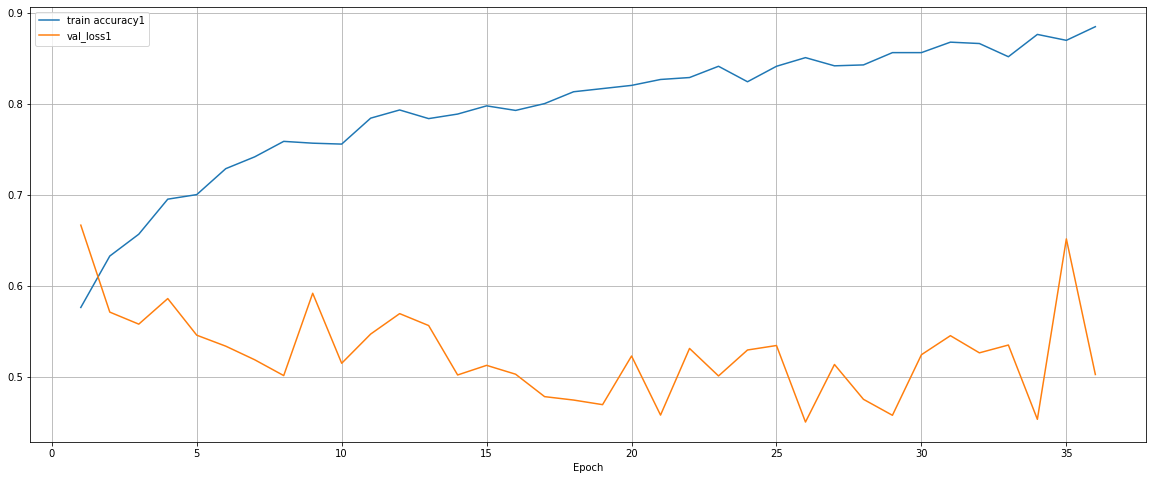

In [29]:
y_acc=hist.history['accuracy']
y_vloss=hist.history['val_loss']
xs=np.arange(1, len(y_acc)+1)
plt.figure(figsize=(20,8))
plt.plot(xs,y_acc,label='train accuracy1')
plt.plot(xs,y_vloss,label='val_loss1')
plt.legend(),
plt.grid(),
plt.xlabel('Epoch')

In [31]:
!jupyter nbconvert -to html '/drive/MyDrive/Colab Notebooks/DeepLearning_2022_05/03.CNN/cat_vs_dog_kaggle_data.ipynb'


[NbConvertApp] WARNING | Unrecognized alias: 'to', it will have no effect.
[NbConvertApp] Converting notebook /drive/MyDrive/Colab Notebooks/DeepLearning_2022_05/03.CNN/cat_vs_dog_kaggle_data.ipynb to html
[NbConvertApp] Writing 397601 bytes to /drive/MyDrive/Colab Notebooks/DeepLearning_2022_05/03.CNN/cat_vs_dog_kaggle_data.html
